<a href="https://colab.research.google.com/github/kanyaweeud/KKU_data_mining/blob/master/Panda101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First, we have to say which packages we are going to use by import them.

In [11]:
import pandas

# Connect with Google drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_Material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os

In [14]:
search_click = os.path.join(path,'search_click.csv')
w_restaurant = os.path.join(path,'w_restaurant.csv')

# Then use pandas to load the data into the environment

In [15]:
search_click_df = pandas.read_csv(search_click)

In [16]:
search_click_df.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [17]:
path

'/content/drive/My Drive/DWDM_Material'

In [18]:
w_restaurant_df = pandas.read_csv(w_restaurant)

# To check if the dimension od loaded data is correct as described in the description

In [19]:
search_click_df.shape

(1048575, 6)

In [20]:
w_restaurant_df.shape

(246847, 32)

It seem everything is ok, let's have fun with data

0. Poimt to data in the table

In [21]:
search_click_df['search_id']

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [22]:
search_click_df['search_id'][0]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [23]:
w_restaurant_df[['name','city_name','weighted_average_rating']] #อยากได้บางส่วนของตาราง 

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


# iloc

In [24]:
search_click_df.iloc[0,1] #การดึงค่าในตาราง

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [25]:
search_click_df.iloc[:10,:2] #แถว0123456789และคอลัม012

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


#Missing Values

In [26]:
search_click_df.isnull() #isnull ใช้เช็ค missing

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [27]:
search_click_df.isnull().any() #any เช็ค missing

click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

## Handling missing values 1

In [28]:
search_click_df_nm = search_click_df.dropna() #dropna โยน missing ออกไป

In [29]:
search_click_df_nm.isnull().any().any()

False

In [30]:
print(search_click_df.shape) #shape ใช้เช็คจำนวนที่หายไป
print(search_click_df_nm.shape) 

(1048575, 6)
(1048206, 6)


## Excercise 1 ตรวจสอบว่า การลบข้อมูล missing ออกจากตาราง w_restaurant จะทำให้ข้อมูลลดลงกี่ %

In [31]:
size_before_drop = w_restaurant_df.shape[0]
size_after_drop = w_restaurant_df.dropna().shape[0]

print(f'size before drop = {size_before_drop} \nsize after drop = {size_after_drop}\\
      \nwhich is {100*((size_before_drop-size_after_drop)/size_before_drop)}')

size before drop = 246847 
size after drop = 4\      
which is 99.99837956304918


## Method 1.5

In [32]:
w_restaurant_df.isnull().any() #ฉลาดขึ้นมาหน่อยก็dropคอลัมภ์ที่ต้องการ

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

In [33]:
w_restaurant_df.dropna(subset=['id','name','price_range']).shape

(180972, 32)

## Method 2 (raplace with reasonable value)

we are replacing missing value in the number of chins with 0

In [34]:
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0) #fillna คือช่องว่าง

In [35]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

## Method 2.1 (raplace with unknow value)

## Method 3

In [36]:
new_table = w_restaurant_df[['name','city_name','avg_price']]
new_table
#NaN คือช่องว่าง ย่อมาจาก Not a number

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


[Panda] select data 

In [37]:
selected_list = new_table['city_name']=='Bangkok Metropolitan Region' 
selected_list

0         False
1          True
2         False
3          True
4          True
          ...  
246842     True
246843     True
246844     True
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [38]:
new_table[selected_list] #เลือก data ที่ต้องการให้เป็น fill อะไร

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN
...,...,...,...
246835,ร้านครัวแกงป่า,Bangkok Metropolitan Region,NaN
246840,โตข้าวต้มปลา,Bangkok Metropolitan Region,NaN
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN


In [39]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'] #วิธีเลือกข้อมูลในคอลัมภ์ (เลือกทุกร้านที่อยู่ในกทม.)

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN
...,...,...,...
246835,ร้านครัวแกงป่า,Bangkok Metropolitan Region,NaN
246840,โตข้าวต้มปลา,Bangkok Metropolitan Region,NaN
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN


## Ex 9 หาราคาเฉลี่ยของร้านในกทม.เท่ากับกี่บาท

In [40]:
new_table[selected_list].dropna() #โยน missing ออกก่อน

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0
...,...,...,...
246458,Farm Design,Bangkok Metropolitan Region,50.0
246472,The Andaman,Bangkok Metropolitan Region,1500.0
246508,ZEN Japanese Restaurant,Bangkok Metropolitan Region,375.0
246666,ต้นเครื่อง,Bangkok Metropolitan Region,375.0


In [41]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'].dropna()['avg_price'].mean() #mean คือหาค่าเฉลี่ย

392.5854715094968

***ด้านล่าง*** อธิบายแต่ละขั้น Ex9

>> 1. เลือกเฉพาะกทม.

In [42]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table.head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


>>  2. ลบ missing

In [43]:
bkk_table_dp = bkk_table.dropna()
bkk_table_dp.head()

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0


>>  3. เลือกเฉพาะ column 'avg_price'

In [44]:
bkk_table_dp_avg_price = bkk_table_dp['avg_price']
bkk_table_dp_avg_price

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

>>  4. หาค่าเฉลี่ย

In [45]:
bkk_table_dp_avg_price.mean()

392.5854715094968

# ***แก้ missing method 3 เติมค่าที่เหมาะสมตามกลุ่มของมัน*** 

In [46]:
bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean())
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


## Ex 9 หาราคาค่าเฉลี่ยของร้านในจังหวัดเชียงใหม่

In [47]:
new_table[selected_list].dropna()

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0
...,...,...,...
246458,Farm Design,Bangkok Metropolitan Region,50.0
246472,The Andaman,Bangkok Metropolitan Region,1500.0
246508,ZEN Japanese Restaurant,Bangkok Metropolitan Region,375.0
246666,ต้นเครื่อง,Bangkok Metropolitan Region,375.0


In [48]:
new_table[new_table['city_name']=='Chiang Mai'].dropna()['avg_price'].mean()

188.41594827586206

In [49]:
ChiangMai_table = new_table[new_table['city_name']=='Chiang Mai']
ChiangMai_table.head()

,name,city_name,avg_price
36,Wrap Master,Chiang Mai,NaN
40,Sozen,Chiang Mai,NaN
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,NaN
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,NaN
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,NaN


In [50]:
ChiangMai_table_dp = ChiangMai_table.dropna()
ChiangMai_table_dp.head()

,name,city_name,avg_price
196,Beer Republic,Chiang Mai,175.0
1465,The Riverside Bar & Restaurant @ Chiang Mai,Chiang Mai,375.0
2978,Juice Street Good Belly Cafe,Chiang Mai,50.0
4683,P.P. หมูจุ่ม & กระทะร้อน,Chiang Mai,175.0
4918,The Duke's,Chiang Mai,175.0


In [51]:
ChiangMai_table_dp_avg_price = ChiangMai_table_dp['avg_price']
ChiangMai_table_dp_avg_price

196       175.0
1465      375.0
2978       50.0
4683      175.0
4918      175.0
          ...  
243517     50.0
244433    175.0
244841     50.0
244937     50.0
245954    375.0
Name: avg_price, Length: 464, dtype: float64

In [52]:
ChiangMai_table_dp_avg_price.mean()

188.41594827586206

>> เอาค่าเฉลี่ยไปเติมในตาราง missing

In [53]:
ChiangMai_table[['avg_price']] = ChiangMai_table[['avg_price']].fillna(ChiangMai_table_dp_avg_price.mean())
ChiangMai_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
36,Wrap Master,Chiang Mai,188.415948
40,Sozen,Chiang Mai,188.415948
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,188.415948
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,188.415948
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,188.415948


# **[PD] ต่อตารางในแนวแกน Y (เพิ่มจำนวน data) pd.concat**
concat คือเอามาต่อกัน

In [54]:
cm_table = new_table[new_table['city_name']=='Chiang Mai']
cm_table[['avg_price']] = cm_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chiang Mai'].dropna()['avg_price'].mean())
cm_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
36,Wrap Master,Chiang Mai,188.415948
40,Sozen,Chiang Mai,188.415948
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,188.415948
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,188.415948
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,188.415948


In [55]:
pd_concat = pandas.concat([bkk_table,cm_table])
pd_concat

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472
...,...,...,...
246783,ส้มตำลำฮิมกอง,Chiang Mai,188.415948
246803,ไก่ทอดปักษ์ใต้ นายหัวโต,Chiang Mai,188.415948
246808,แคลิฟอร์เนียเวร็ป,Chiang Mai,188.415948
246813,TOONGs COFFEE Roasters,Chiang Mai,188.415948


# Method 3 Looping (concat)

1. ดึงจังหวัดที่มีอยู่ทั้งหมดในตารางออกมา

In [56]:
all_cities = set(new_table['city_name'])
len(all_cities)

479

2. คำนวณค่า mean ของ column 'city_name' เพื่อเก็บไว้เติมใส่
เมืองที่เป็น missing ทุกร้าน

In [57]:
all_mean = new_table.dropna(subset=['avg_price'])['avg_price'].mean()
all_mean

327.44728783902013

3. สร้าง list ของตารางของทุกๆจังหวัด

In [58]:
all_cities_list = []
for each_city in list(all_cities):

    # cm_table = new_table[new_table['city_name']=='Chiang Mai']
    # cm_table[['avg_price']] = cm_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chiang Mai'].dropna()['avg_price'].mean())
 
    temp_table = new_table[new_table['city_name']==each_city]
    temp_table[['avg_price']] = temp_table[['avg_price']].fillna(new_table[new_table['city_name']==each_city].dropna()['avg_price'].mean())
    all_cities_list.append(temp_table)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

4. สร้างตารางจาก list ของตาราง ด้วย pd.concat

In [59]:
all_no_missing = pandas.concat(all_cities_list)
all_no_missing

,name,city_name,avg_price
13710,China Town,Colorado,NaN
81843,May palace,Colorado,NaN
144952,Red Lobster,Colorado,NaN
150732,Garfield's Off Broadway,Colorado,NaN
134571,Shabu Indy,Lac,NaN
...,...,...,...
245387,แพโชคอำนวย,Nakhon Phanom,NaN
245707,ร้านก๋วยเตี๋ยวเจ้รัตน์ นาแข(เจ้าเก่า),Nakhon Phanom,NaN
246380,เด็ดนคร@นครพนม,Nakhon Phanom,NaN
246411,ร้านอาหารบ้านนคร,Nakhon Phanom,NaN


5. เติมค่า mean ของทั้งตารางให้กับจังหวัดที่ไม่มี mean

In [60]:
all_no_missing = all_no_missing.fillna(all_mean)
all_no_missing.isnull().any()

name         False
city_name    False
avg_price    False
dtype: bool

In [61]:
all_no_missing

,name,city_name,avg_price
13710,China Town,Colorado,327.447288
81843,May palace,Colorado,327.447288
144952,Red Lobster,Colorado,327.447288
150732,Garfield's Off Broadway,Colorado,327.447288
134571,Shabu Indy,Lac,327.447288
...,...,...,...
245387,แพโชคอำนวย,Nakhon Phanom,327.447288
245707,ร้านก๋วยเตี๋ยวเจ้รัตน์ นาแข(เจ้าเก่า),Nakhon Phanom,327.447288
246380,เด็ดนคร@นครพนม,Nakhon Phanom,327.447288
246411,ร้านอาหารบ้านนคร,Nakhon Phanom,327.447288


# **Remove Outlier (boxplot)**

Quiz วาด boxplot ของ ค่า 'avg_price' ของตาราง all_no_missing (แนวนอน)

In [62]:
from matplotlib import pyplot as plt

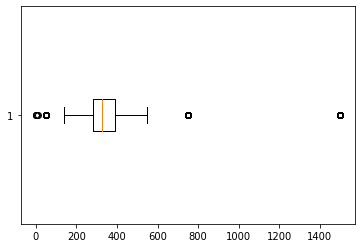

In [63]:
ret = plt.boxplot(all_no_missing['avg_price'],vert=False)

In [64]:
print(ret['whiskers'][0].get_xdata()[1])
print(ret['whiskers'][1].get_xdata()[1])

138.1578947368421
549.0


In [65]:
nooutlier_nomissing = all_no_missing[all_no_missing['avg_price']>=ret['whiskers'][0].get_xdata()[1]]
nooutlier_nomissing = nooutlier_nomissing[nooutlier_nomissing['avg_price']<=ret['whiskers'][1].get_xdata()[1]]
nooutlier_nomissing

,name,city_name,avg_price
13710,China Town,Colorado,327.447288
81843,May palace,Colorado,327.447288
144952,Red Lobster,Colorado,327.447288
150732,Garfield's Off Broadway,Colorado,327.447288
134571,Shabu Indy,Lac,327.447288
...,...,...,...
245387,แพโชคอำนวย,Nakhon Phanom,327.447288
245707,ร้านก๋วยเตี๋ยวเจ้รัตน์ นาแข(เจ้าเก่า),Nakhon Phanom,327.447288
246380,เด็ดนคร@นครพนม,Nakhon Phanom,327.447288
246411,ร้านอาหารบ้านนคร,Nakhon Phanom,327.447288


~ Smooth data (binning) ~

Reduce Data (Deduplication (remove duplication), sampling (randomly select data) vs PCA (reduce dimensions of data))

Data Integration (combine 2 tables vs copy some columns from another table)

# 1. Adding a field from other table
or merge the entire tables https://www.kaggle.com/crawford/python-merge-tutorial/#

one selected column
.map()

In [66]:
search_click_df['bu_name'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['name'])

In [67]:
search_click_df

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,ปูดองอันยอง Eight
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,Yoshinoya
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,The Hub Cafe and Eatery
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,ซั่งไห่ เสี่ยวหลงเปา
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,Yoshinoya
...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,เสกแจ่วฮ้อน
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,ก๋วยเตี๋ยวหมูหน่อกะลา
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,Laemcharoen Seafood
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,เอี่ยวไถ่ สุกี้โบราณ


# 4. One-hot-encoder for Categorical data

In [68]:
w_restaurant_df = pandas.get_dummies(w_restaurant_df, columns=['wifi'])

In [69]:
w_restaurant_df

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery,wifi_0.0,wifi_1.0,wifi_2.0
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,0.0,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,0,0,0
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,0.0,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,0.0,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,0.0,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,0.0,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246842,340068,Sushi Tama,1,0,Bangkok Metropolitan Region,11130,w4rqtcb,0,3.663522,3.0,40.0,27,1,10118,18,0,21,Sushi,2.0,NaN,3.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
246843,340070,สะบายดี คาราโอเกะ,1,0,Bangkok Metropolitan Region,NaN,w4rwjcg,0,0.000000,0.0,1.0,0,0,537,1,0,0,Karaoke,1.0,NaN,3.0,0.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,0,0,0
246844,340074,สเต็กแม่&กาแฟลูก,1,0,Bangkok Metropolitan Region,10160,w4rmvxf,0,4.000000,0.0,11.0,1,0,1268,3,0,6,Steak House/Barbeque,2.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
246845,340079,Mom Made,1,0,Nakhon Si Thammarat,80000,w1x04g6,0,5.000000,0.0,6.0,1,2,4031,0,0,2,Café/Coffee Shop,1.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


# 8. Group By -- Aggregation
https://www.kaggle.com/crawford/python-groupby-tutorial#

In [70]:
groups = search_click_df.groupby('business_id')

In [71]:
groups

In [72]:
groups.count()

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name
business_id,,,,,,
2.0,4,4,4,4,4,4
5.0,2,2,2,2,2,2
6.0,6,6,6,6,6,6
7.0,3,3,3,3,3,3
14.0,5,5,5,5,5,5
...,...,...,...,...,...,...
340060.0,4,4,4,4,4,4
340063.0,1,1,1,1,1,1
340067.0,2,2,2,2,2,2


In [73]:
count_table=groups.count().reset_index()

In [74]:
w_restaurant_df['num_click'] = w_restaurant_df['id'].map(count_table.set_index('business_id')['ads'])

In [75]:
w_restaurant_df

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery,wifi_0.0,wifi_1.0,wifi_2.0,num_click
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,0.0,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,0,0,0,4.0
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,0.0,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,0.0,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2.0
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,0.0,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,6.0
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,0.0,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246842,340068,Sushi Tama,1,0,Bangkok Metropolitan Region,11130,w4rqtcb,0,3.663522,3.0,40.0,27,1,10118,18,0,21,Sushi,2.0,NaN,3.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,6.0
246843,340070,สะบายดี คาราโอเกะ,1,0,Bangkok Metropolitan Region,NaN,w4rwjcg,0,0.000000,0.0,1.0,0,0,537,1,0,0,Karaoke,1.0,NaN,3.0,0.0,1.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,0,0,0,9.0
246844,340074,สเต็กแม่&กาแฟลูก,1,0,Bangkok Metropolitan Region,10160,w4rmvxf,0,4.000000,0.0,11.0,1,0,1268,3,0,6,Steak House/Barbeque,2.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
246845,340079,Mom Made,1,0,Nakhon Si Thammarat,80000,w1x04g6,0,5.000000,0.0,6.0,1,2,4031,0,0,2,Café/Coffee Shop,1.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN


In [76]:
## Build a table which only shows id, name, rating, num_clicks. How?

# **QUIZ หาจังหวัดที่มีคน click เข้าไปมากที่สุดสามอันดับแรก**

In [77]:
search_click_df.groupby('business_id').count().set_index('id')['city_name'])

SyntaxError: ignored